In [1]:
!ls Data/Fitting

scan0062.dat


In [2]:
!cat Data/Fitting/scan0062.dat

In [3]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html
import numpy as np
headers = "   Pt.         s2         s1       time   detector    monitor        mcu         m2        sgl        sgu        stl        stu   slita_bt   slita_lf   slita_rt   slita_tp         a1         a2          q          h          k          l         ei         ef          e    coldtip    tsample       temp"
# Note that by default, any consecutive whitespaces act as delimiter. 
data = np.genfromtxt('Data/Fitting/scan0062.dat', names=headers.split())
data

array([( 1., -19.9205, -8.1965, 4.882, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9195, 0.    ,  0., 1.9236, 14.6387, 14.6393, -0.0006, 24.004, 24.526, 24.),
       ( 2., -19.9717, -8.2211, 4.876, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9218, 0.    ,  0., 1.9285, 14.6387, 14.6393, -0.0006, 24.005, 24.527, 24.),
       ( 3., -20.0218, -8.2447, 4.878, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9241, 0.0001,  0., 1.9333, 14.6387, 14.6393, -0.0006, 23.998, 24.526, 24.),
       ( 4., -20.0691, -8.2703, 4.878, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9263, 0.    ,  0., 1.9378, 14.6387, 14.6393, -0.0006, 23.994, 24.526, 24.),
       ( 5., -20.1222, -8.2949, 4.871, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554

# Plotting

Note in the metadata the default columns to plot

```
# def_x = s2
# def_y = detector
```

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

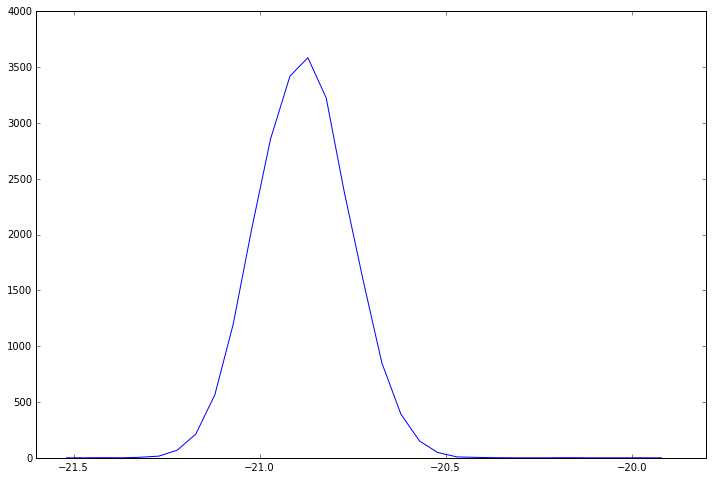

In [8]:
data_x = data['s2']
data_y = data['detector']
plt.plot(data_x, data_y)

# Fitting


In [9]:
def gaussian(x, A, center, fwhm):
    '''
    Gaussian with fwhm and not sigma
    '''
    return A * np.exp(-4 * np.log(2) * (x - center)**2 / fwhm**2)

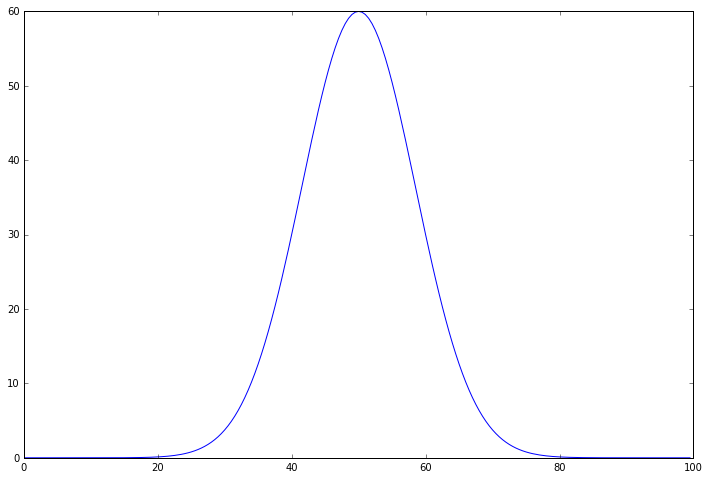

In [10]:
# Let's plot this function to see what it looks like
x = np.arange(0, 100, 0.5) # From 0 to 100 with 0.5 step
y = gaussian(x, 60, 50, 20)
plt.plot(x,y)

## Scipy optimise

It's wrapper around `scipy.optimize.leastsq`.


See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


In [11]:
from scipy.optimize import curve_fit

init_vals = [3500, -20.9, 1]  # for [A, center, fwhm]
best_vals, covar = curve_fit(gaussian, data_x, data_y, p0=init_vals)
best_vals

array([ 3.60986554e+03, -2.08842888e+01,  2.95157813e-01])

In [12]:
# Errors
print("Errors associated with the parameters: {}".format(np.sqrt(np.diag(covar))))

Errors associated with the parameters: [1.45111953e+01 5.86131713e-04 1.37629735e-03]


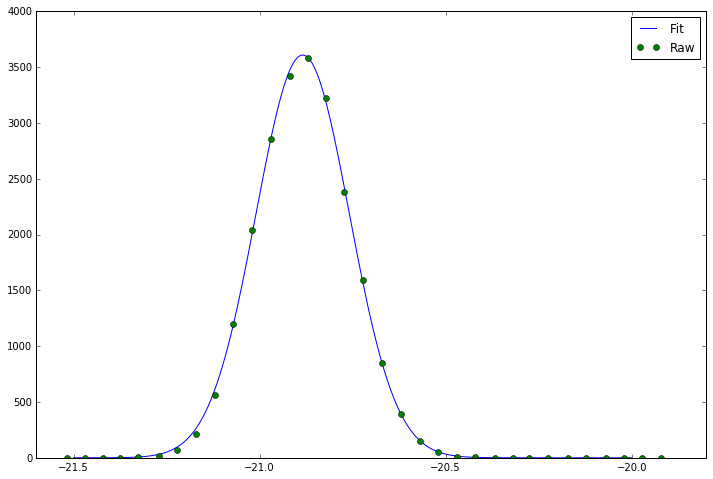

In [13]:
fit_x = np.linspace(-21.5, -20, 200)
fit_y = gaussian(fit_x, *best_vals)

plt.plot(fit_x, fit_y, label="Fit")
plt.plot(data_x, data_y, marker="o", linestyle = 'None', label="Raw")
plt.legend()

## LMFit

Non-Linear Least-Squares Minimization and Curve-Fitting

See: See: https://lmfit.github.io

In [14]:
from lmfit import Model
gmodel = Model(gaussian)

In [15]:
# Nice things
print(gmodel.param_names)
print(gmodel.independent_vars)

['A', 'center', 'fwhm']
['x']


In [16]:
# Fitting
result = gmodel.fit(data_y, x=data_x, A=3500, center=-20.9, fwhm=1)
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 33
    # variables        = 3
    chi-square         = 18900.55399
    reduced chi-square = 630.01847
    Akaike info crit   = 215.56449
    Bayesian info crit = 220.05401
[[Variables]]
    A:        3609.86554 +/- 14.51119 (0.40%) (init= 3500)
    center:  -20.8842888 +/- 0.000586 (0.00%) (init=-20.9)
    fwhm:     0.29515781 +/- 0.001376 (0.47%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(A, fwhm)                   = -0.574



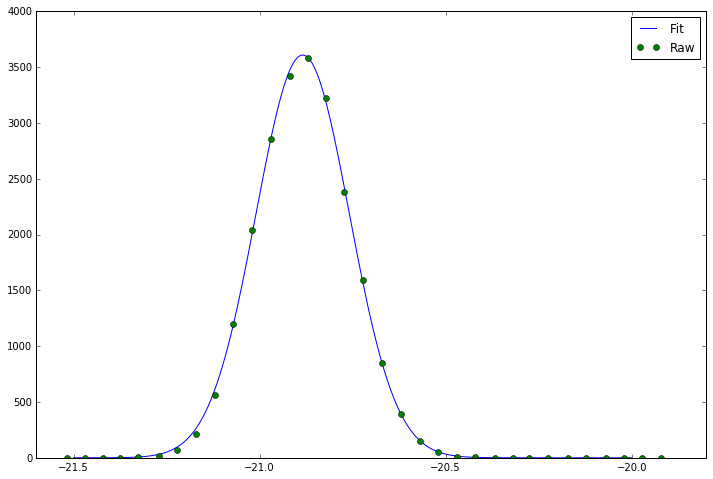

In [17]:
plt.plot(fit_x, result.eval(x=fit_x), label="Fit")
plt.plot(data_x, data_y, marker="o", linestyle = 'None', label="Raw")
plt.legend()